#### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_excel('Titanic_dataset.xlsx')
data.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [3]:
# To find out which column has a null value
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

#### Dealing with null value

In [4]:
def replace_nan_with_avg(col):
    avg = data[col].mean()
    round(avg, 2)
    data[col].fillna(avg, inplace=True)

replace_nan_with_avg('age')
replace_nan_with_avg('fare')

In [5]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

In [6]:
# Separating the inputs and the targets
inputs = data.drop(columns=['survived', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis = 1, inplace= False)
targets = data['survived']

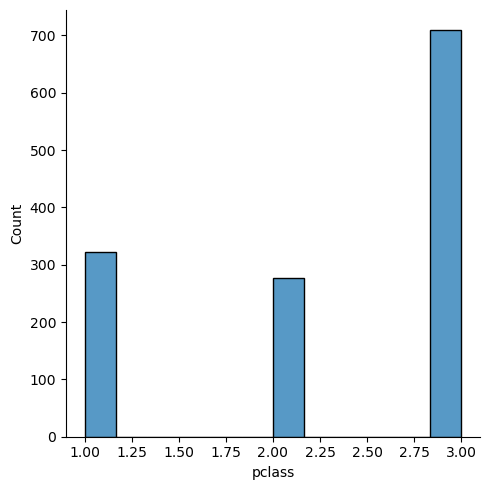

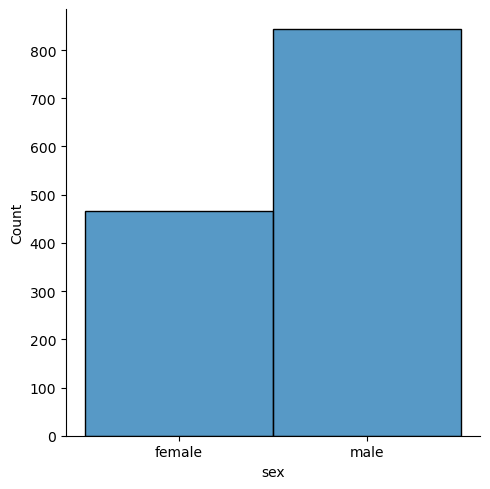

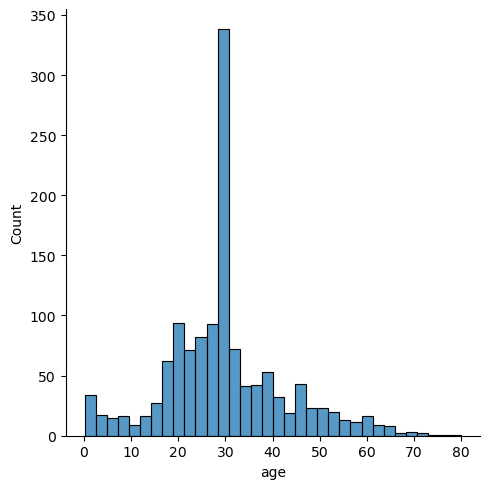

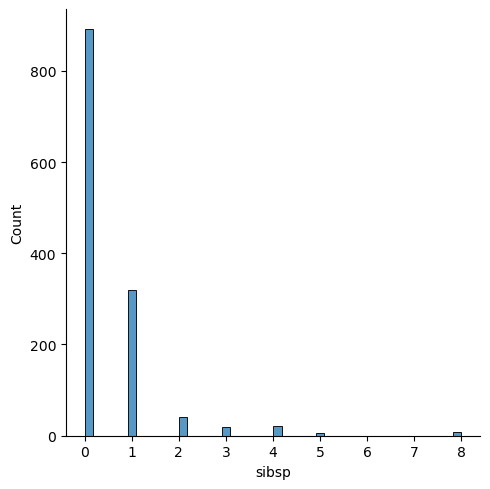

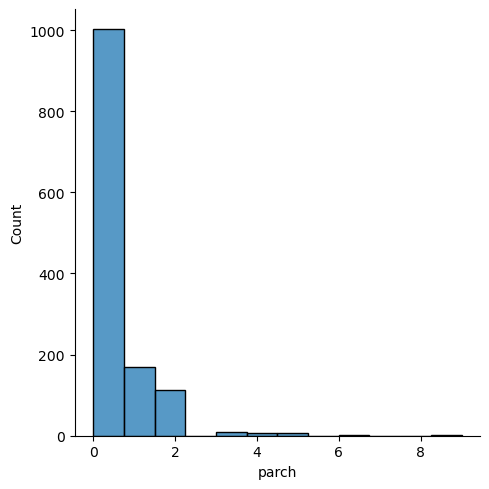

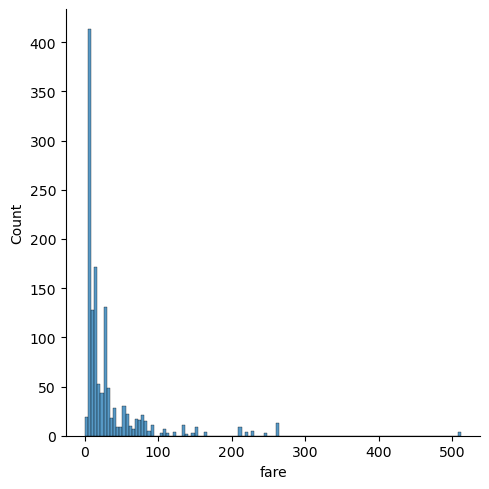

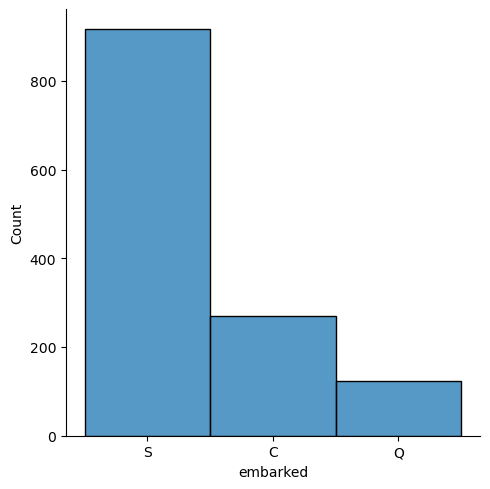

In [7]:
# Visualizing the inputs columns
sns.displot(inputs['pclass'])
sns.displot(inputs['sex'])
sns.displot(inputs['age'])
sns.displot(inputs['sibsp'])
sns.displot(inputs['parch'])
sns.displot(inputs['fare'])
sns.displot(inputs['embarked'])

#### Balancing the dataset

In [8]:
ones = int(targets.sum())
zeros_counter = 0
indices_to_remove = []
for i in range(targets.shape[0]):
    if targets[i] == 0:
        zeros_counter += 1
        if zeros_counter > ones:
            indices_to_remove.append(i)

balanced_inputs = inputs.drop(indices_to_remove, axis=0, inplace = False)
balanced_targets = targets.drop(indices_to_remove, axis=0, inplace = False)

In [9]:
# To create the dummy variables
inputs_with_dummies = pd.get_dummies(inputs, drop_first=True)
inputs_with_dummies

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,29.000000,0,0,211.3375,0,0,1
1,1,0.916700,1,2,151.5500,1,0,1
2,1,2.000000,1,2,151.5500,0,0,1
3,1,30.000000,1,2,151.5500,1,0,1
4,1,25.000000,1,2,151.5500,0,0,1
...,...,...,...,...,...,...,...,...
1304,3,14.500000,1,0,14.4542,0,0,0
1305,3,29.881135,1,0,14.4542,0,0,0
1306,3,26.500000,0,0,7.2250,1,0,0
1307,3,27.000000,0,0,7.2250,1,0,0


#### Scaling the dataset

In [10]:
scaled_inputs = preprocessing.scale(inputs_with_dummies)

In [11]:
# Checking the data type of inputs and targets
print(type(scaled_inputs))
print(type(balanced_targets))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [12]:
# Converting the datasets into pd.DataFrame data type 
scaled_inputs = pd.DataFrame(scaled_inputs)
balanced_targets = pd.DataFrame(targets)

#### Shuffling the dataset

In [13]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs.iloc[shuffled_indices]
shuffled_targets = balanced_targets.iloc[shuffled_indices]